In [1]:
# Connecting to TPU via Google Colab (needed only when running Bert model)

import tensorflow as tf

try:
  # TPU detection
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
  
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
print("All devices: ", tf.config.list_logical_devices('TPU'))


Running on TPU  ['10.30.230.10:8470']


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [2]:
# For running in google colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Step 1: Running the library file(library_classifier.ipynb)

%run '/content/drive/MyDrive/Research project 1/library_model2.ipynb'


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 70.0 MB/s eta 0:00:00
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Step 2: Creating train, dev and test datasets

df=create_df()

train_df size 3946
dev_df size 2959
test_df size 2960
verb count in train, dev & test 64 64 64


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [ ]:
"""
Please note that, Step 3 has to be run for each dataset(train, dev and test) 
"""

In [5]:
# Step 3: Getting the inputs for Bert i.e., tokens(input_ids)

input_ids = tokenize(df[2]["Sentence"])

In [ ]:
# Step 4: Loading output labels from pickle

import pickle

with open('/content/drive/MyDrive/Research project 1/test_label.pkl', 'rb') as f:
  test_label = pickle.load(f)


In [ ]:
print("Sample output labels from pickle",  test_label[0:3])

Sample output labels from pickle [0 1 1]


In [ ]:
"""
Step 5: Building the model2 

In order to determine the efficieny of model1 which has been developed based on our own pseudocode,
we are comparing it with model2 which is a standard approach following in real-time.
"""

# Building the model2

with tpu_strategy.scope():
  model2=build_model2()

Some layers from the model checkpoint at bert-base-german-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-german-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 420)]             0         
                                                                 
 tf_bert_model (TFBertModel)  TFBaseModelOutputWithPoo  109081344
                             lingAndCrossAttentions(l            
                             ast_hidden_state=(None,             
                             420, 768),                          
                              pooler_output=(None, 76            
                             8),                                 
                              past_key_values=None, h            
                             idden_states=None, atten            
                             tions=None, cross_attent            
                             ions=None)                          
                                                             

In [ ]:
# Step 6: Training model2 by passing the tokens(input_ids) & output labels of train data 

history=model2.fit(input_ids[0],train_label,batch_size=128, epochs=5)

Epoch 1/5


31/31 [==============================] - 147s 2s/step - loss: 1.7981 - accuracy: 0.7970
Epoch 2/5
31/31 [==============================] - 13s 412ms/step - loss: 0.5452 - accuracy: 0.8203
Epoch 3/5
31/31 [==============================] - 13s 412ms/step - loss: 0.4618 - accuracy: 0.8647
Epoch 4/5
31/31 [==============================] - 13s 412ms/step - loss: 0.4262 - accuracy: 0.8649
Epoch 5/5
31/31 [==============================] - 13s 412ms/step - loss: 0.4215 - accuracy: 0.8649


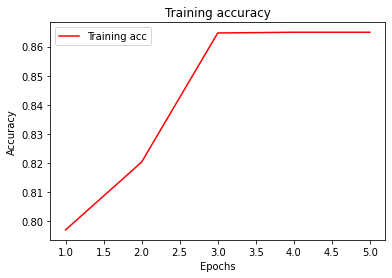

In [ ]:
# Plotting the training accuracy of model2 in graph

import matplotlib.pyplot as plt

history_dict = history.history
acc_values = history_dict["accuracy"]
epochs = range(1, len(acc_values)+1)
plt.plot(epochs, acc_values, color="red", label="Training acc")
plt.title("Training accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Step 7: Saving model2 which is trained

model2.save('/content/drive/MyDrive/Research project 1/model2.h5')

In [6]:
# Step 8: Loading the saved model2

import transformers
model2 = tf.keras.models.load_model('/content/drive/MyDrive/Research project 1/model2.h5',custom_objects={"TFBertModel": transformers.TFBertModel})

In [ ]:
# Step 9: Evaluating model2 by passing dev data (validation)

model_score = model2.evaluate(input_ids[0], dev_label, batch_size=128)

24/24 [==============================] - 533s 22s/step - loss: 0.4139 - accuracy: 0.8574


In [7]:
# Step 10: Testing model2 by passing test data

import pandas as pd

prediction = model2.predict(input_ids[0])
predict_binary_labels = list(map(lambda x: 0 if x<0.5 else 1, prediction))
print(predict_binary_labels[0:10])

predicted_labels = ["psych" if i==1 else "non-psych" for i in predict_binary_labels]
print(predicted_labels[0:10])

# Adding predicted_label column to the test dataset
test_df=pd.read_excel("/content/drive/MyDrive/Research project 1/test_df.xlsx")
test_df["predicted_label"] = predicted_labels
test_df["unmatched"] = ["matched" if i == j  else "unmatched" for i,j in zip(test_df["non-psych"],test_df["predicted_label"])]

# Calculating the test score of model2
final_score= len(test_df[test_df["unmatched"] == "matched"])/len(test_df["unmatched"])

# Printing the score & predicted labels result
print("Final accuracy score of model2: ", final_score)
print("Total no. of data in test dataset: ",len(test_df))
print("No. of data correctly predicted by model2: ", len(test_df[test_df["unmatched"] == "matched"]))
print("No. of data not correctly predicted by model2: ",len(test_df[test_df["unmatched"] == "unmatched"]))

# Printing verbs which are not correctly predicted by the model during testing
temp_df=pd.DataFrame()
temp_df = test_df.loc[test_df["unmatched"] == "unmatched"]
temp_df = temp_df[["Verb"]]
    
vrb_unmtch_dct = temp_df["Verb"].value_counts().to_dict()
vrb_unmtch=str(vrb_unmtch_dct)
print("Below are the verbs & their counts for which model doesn't predict correct label during testing: ",vrb_unmtch)



93/93 [==============================] - 659s 7s/step
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
['psych', 'psych', 'psych', 'psych', 'psych', 'psych', 'psych', 'psych', 'psych', 'psych']
Final accuracy score of model2:  0.8577702702702703
Total no. of data in test dataset:  2960
No. of data correctly predicted by model2:  2539
No. of data not correctly predicted by model2:  421
Below are the verbs & their counts for which model doesn't predict correct label during testing:  {'ausreichen': 54, 'genügen': 51, 'zusetzen': 35, 'guttun': 34, 'provozieren': 33, 'bewegen': 31, 'stören': 31, 'aufstoßen': 28, 'schwerfallen': 27, 'gefallen': 16, 'quälen': 16, 'beruhigen': 16, 'aufwühlen': 11, 'überfordern': 10, 'verwirren': 8, 'schmeicheln': 5, 'widerstreben': 4, 'ekeln': 3, 'zermürben': 2, 'bedrücken': 1, 'irritieren': 1, 'verstören': 1, 'einleuchten': 1, 'plagen': 1, 'entmutigen': 1}
